---------- Start Fitting... -------------
A: [[ 5.93129656 -3.04193672]
 [-3.04193672  1.6319977 ]]
b: [13.90381519 -7.05871141]
c: 1.3938705586457292
---------- Start Predicting... ----------
Accuracy_10 0.9
---------- Start Fitting... -------------
A: [[-0.03010296  0.19049287]
 [ 0.19049287 -0.24926753]]
b: [ 5.55785586 -2.53330998]
c: 0.17936371707616472
---------- Start Predicting... ----------
Accuracy_100: 0.83 


---------- Start Fitting... -------------
A: [[ 5.83415172 -3.45816055]
 [-3.45816055  2.13826699]]
b: [14.03981797 -6.47599806]
c: 0.98189389977496
---------- Start Predicting... ----------
Accuracy_10 (without convariance): 0.9
---------- Start Fitting... -------------
A: [[-0.17056268  0.25810305]
 [ 0.25810305 -0.37685642]]
b: [ 5.75449948 -2.62796423]
c: 0.3525171823560862
---------- Start Predicting... ----------
Accuracy_100 (without convariance): 0.84 


---------- Start Fitting... -------------
A: [[ 5.67719105 -3.53840798]
 [-3.53840798  2.22431027]]
b: [12.9

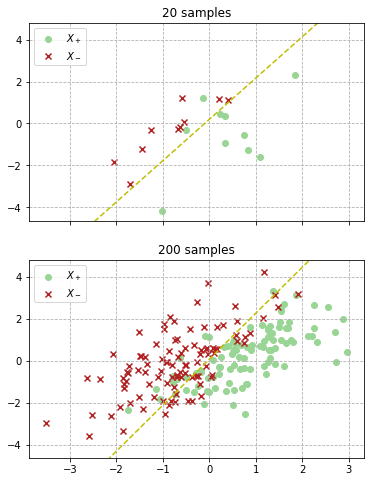

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

class QDA:
    def __init__(self):
        self.A = None
        self.b = None
        self.c = None
        
    def fit(self, x, y, mean_plus=None, mean_minus=None, covariance_plus=None, covariance_minus=None):       
        print("---------- Start Fitting... -------------")
        # Seperate data into two classes
        idx_plus = (y == 1)
        idx_minus = (y == -1)
        x_plus = x[idx_plus]
        x_minus = x[idx_minus]
        #print('x_plus:\n', x_plus)
        #print('x_minus:\n', x_minus)
        
        # Mean & Covariance
        if mean_plus is None:
            mean_plus = np.mean(x_plus, axis=0)
        if mean_minus is None:    
            mean_minus = np.mean(x_minus, axis=0)
        if covariance_plus is None:
            covariance_plus = np.matmul((x_plus-mean_plus).T, x_plus-mean_plus) / x_plus.shape[0]
        if covariance_minus is None:    
            covariance_minus = np.matmul((x_minus-mean_minus).T, x_minus-mean_minus) / x_minus.shape[0]
            
        covariance_plus_inv = np.linalg.inv(covariance_plus)
        covariance_minus_inv = np.linalg.inv(covariance_minus)
        
        # Prior
        prior_plus = x_plus.shape[0] / (x.shape[0])
        prior_minus = 1 - prior_plus
        
        # A, b, c
        self.A = covariance_minus_inv - covariance_plus_inv
        self.b = 2*(mean_plus@covariance_plus_inv - mean_minus@covariance_minus_inv)
        self.c = mean_minus@covariance_minus_inv@mean_minus - mean_plus@covariance_plus_inv@mean_plus - \
                2*(np.log(prior_minus*np.sqrt(np.linalg.det(covariance_plus))) - np.log(prior_plus*np.sqrt(np.linalg.det(covariance_minus))))
         
        print("A:", self.A)
        print("b:", self.b)
        print("c:", self.c)
        
    def predict(self, x):
        print("---------- Start Predicting... ----------")
        y_hat = np.zeros(x.shape[0])
        #print(x.shape)
        for i in range(x.shape[0]):
            y_hat[i] = np.sign(x[i]@self.A@x[i].T + x[i]@self.b + self.c)
            
        return y_hat
            
def plot_samples(axes, x_plus, x_minus):
    axes.scatter(x_plus[:,0], x_plus[:,1], marker='o', color='#99d594', label='$X_+$')
    axes.scatter(x_minus[:, 0], x_minus[:, 1], marker='x', color='firebrick', label='$X_-$')
    axes.grid(linestyle='--')
    axes.set_title(str(x_plus.shape[0]*2) + " samples")
    axes.legend(loc = 'upper left')
    
def plot_boundary(axes, w, b):
    a = -w[0]/w[1]
    b = -b/w[1]
    
    min_x, max_x, min_y, max_y = axes.axis()
    axes.axis([min_x, max_x, min_y, max_y])
    line_x = np.array([min_x, max_x])
    line_y = a*line_x+b
    #print("line_x:", line_x)
    #print("line_y:", line_y)
    axes.plot(line_x, line_y, linestyle='--', color='y', label='LDA decision surface')

#------------------------------------------------------------------------------
# create samples
mean_plus = np.array([0.7, 0])
mean_minus = np.array([-0.7, 0])
cov_matrix = np.array([[1, 1], [1, 2]])
x_plus_10 = np.random.multivariate_normal(mean_plus, cov_matrix, 10)
x_minus_10 = np.random.multivariate_normal(mean_minus, cov_matrix, 10)
x_plus_100 = np.random.multivariate_normal(mean_plus, cov_matrix, 100)
x_minus_100 = np.random.multivariate_normal(mean_minus, cov_matrix, 100)

figsize = rcParams['figure.figsize']
figsize[1] *= 2
fig, (ax_10, ax_100) = plt.subplots(2, 1, figsize=figsize ,sharex='all', sharey='all')
plot_samples(ax_10, x_plus_10, x_minus_10)
plot_samples(ax_100, x_plus_100, x_minus_100)

#-------------------------------------------------
# Task 2.(c)
x = np.vstack((x_plus_10, x_minus_10))
y = np.array([1]*x_plus_10.shape[0] + [-1]*x_minus_10.shape[0])
myQDA_10 = QDA()
myQDA_10.fit(x, y, mean_plus, mean_minus, cov_matrix)
y_hat = myQDA_10.predict(x)
Accuracy_10 = np.mean(y == y_hat)
print("Accuracy_10", Accuracy_10)
plot_boundary(ax_10, myQDA_10.b, myQDA_10.c)

x = np.vstack((x_plus_100, x_minus_100))
y = np.array([1]*x_plus_100.shape[0] + [-1]*x_minus_100.shape[0])
myQDA_100 = QDA()
myQDA_100.fit(x, y, mean_plus, mean_minus, cov_matrix)
y_hat = myQDA_100.predict(x)
Accuracy_100 = np.mean(y == y_hat)
print("Accuracy_100:", Accuracy_100, "\n\n")
plot_boundary(ax_100, myQDA_100.b, myQDA_100.c)

#-------------------------------------------------
# Task 2.(d)
x = np.vstack((x_plus_10, x_minus_10))
y = np.array([1]*x_plus_10.shape[0] + [-1]*x_minus_10.shape[0])
myQDA_10 = QDA()
myQDA_10.fit(x, y, mean_plus, mean_minus)
y_hat = myQDA_10.predict(x)
Accuracy_10 = np.mean(y == y_hat)
print("Accuracy_10 (without convariance):", Accuracy_10)

x = np.vstack((x_plus_100, x_minus_100))
y = np.array([1]*x_plus_100.shape[0] + [-1]*x_minus_100.shape[0])
myQDA_100 = QDA()
myQDA_100.fit(x, y, mean_plus, mean_minus)
y_hat = myQDA_100.predict(x)
Accuracy_100 = np.mean(y == y_hat)
print("Accuracy_100 (without convariance):", Accuracy_100, "\n\n")

#-------------------------------------------------
# Task 2.(e)
x = np.vstack((x_plus_10, x_minus_10))
y = np.array([1]*x_plus_10.shape[0] + [-1]*x_minus_10.shape[0])
myQDA_10 = QDA()
myQDA_10.fit(x, y)
y_hat = myQDA_10.predict(x)
Accuracy_10 = np.mean(y == y_hat)
print("Accuracy_10 (without mean & convariance):", Accuracy_10)

x = np.vstack((x_plus_100, x_minus_100))
y = np.array([1]*x_plus_100.shape[0] + [-1]*x_minus_100.shape[0])
myQDA_100 = QDA()
myQDA_100.fit(x, y)
y_hat = myQDA_100.predict(x)
Accuracy_100 = np.mean(y == y_hat)
print("Accuracy_100 (without mean & convariance):", Accuracy_100, "\n\n")

In [3]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)
y = model.sampling().extract()['y']
y.mean()  # with luck the result will be near 0

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


-0.03054464151508097

In [4]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)
print(fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          8.03    0.17   5.07  -1.88    4.8   8.09  11.23  18.24    902    1.0
tau          6.4     0.2   5.24   0.18    2.4   5.34    9.0  19.67    717    1.0
eta[1]      0.37    0.02   0.94  -1.54  -0.24   0.37   1.01   2.15   2114    1.0
eta[2]   -1.7e-3    0.02   0.86   -1.7  -0.56 4.1e-3   0.54   1.75   2057    1.0
eta[3]     -0.19    0.02   0.91  -2.01  -0.83  -0.19   0.43   1.58   2042    1.0
eta[4]     -0.06    0.02   0.87   -1.8  -0.63  -0.04   0.53    1.6   2200    1.0
eta[5]     -0.36    0.02   0.87  -2.05  -0.96  -0.36    0.2   1.35   2148    1.0
eta[6]     -0.24    0.02   0.88  -1.94  -0.83  -0.24   0.32   1.54   2299    1.0
eta[7]      0.33    0.02   0.88  -1.36  -0.28   0.34   0.89    2.1   1780    1.0
eta